<a href="https://colab.research.google.com/github/zhou-en/Notebooks/blob/main/FibrePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import itertools

plt.style.use('seaborn-whitegrid')
# if using a Jupyter notebook, include:
%matplotlib inline
max_speed = 100
min_speed = 20
blacklist = ["telkom", "vodacom", ]#"easyweb", "bitco", "homeconnect", "supersonic"]
whitelist = ["vox", "axxess", "mweb", "homeconnect", "webafrica", "fibrestream", "rsaweb", "cellc"]

In [2]:
url = "https://www.fibretiger.co.za/api/server.php"

# sslug - ISP Name
# shaped
# price - Monthly fee in Rand
# speed_down - Download speed in Mb
# speed_up - Upload speed in Mb

speed_up = 1
speed_down = min_speed

minspeed_in_mb = speed_down
network = "vumatel"
uncapped = 1
params = {"minspeed": minspeed_in_mb,"slug":False,"nslug": network,"redirect":0,"uncapped": uncapped,"homeq":False}
data = {"id":1,"method":"package_get_all","params":[params]}

response = requests.post(url, json=data )
package_list = response.json()["result"]["packageList"]
# print(json.dumps(package_list, indent=4))
# for package in package_list:
#     if package.get("sslug") == "axxess":
#         # if (speed_down == package.get('speed_down')):
#         if "shaped" in package:
#             print(
#                 f"\n{package.get('sslug')}\n---\nPrice: R{package.get('price')}\nDownload: {package.get('speed_down')}Mb\nUpload: {package.get('speed_up')}Mb\nShaped: {package.get('shaped')}\n"
            # )

In [3]:
isp_data = {}

speed_list = []
isp_list = []
for p in package_list:
    isp_name = p.get("sslug")
    down_speed = p.get("speed_down")
    up_speed = p.get("speed_up")
    shaped = p.get("shaped")
    rating = p.get("rating")
    price = p.get("price")

    if min_speed <= down_speed <= max_speed and isp_name in whitelist:
        if isp_name not in isp_data:
            isp_data.update(
                {
                    isp_name: {
                        "prices": {
                            down_speed: {
                                up_speed: price
                            }
                        },
                        "rating": rating,
                        "shaped": shaped
                    }
                }
            )
        else:
            if down_speed not in isp_data[isp_name]["prices"]:
                isp_data[isp_name]["prices"].update(
                    {
                        down_speed: {
                            up_speed: price
                        }
                    }
                )
            else:
                if up_speed not in isp_data[isp_name]["prices"][down_speed]:
                    isp_data[isp_name]["prices"][down_speed].update(
                        {
                            up_speed: price
                        }
                    )


# print(json.dumps(isp_data['vodacom'], indent=4))



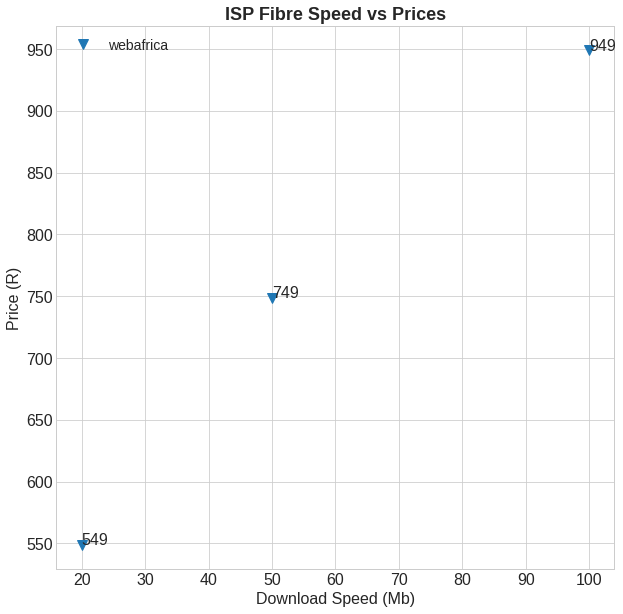

In [4]:

marker = itertools.cycle(("v", "+", "P", ".", "o", ">",  "*", "^", "d", "s", "X", "<"))
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

for name, isp in isp_data.items():
    speed_list = [int(k) for k in isp["prices"].keys()]
    price_values = []
    for speed, prices in isp["prices"].items():
        for up_speed, price in prices.items():
            if up_speed != speed:
                price_values.append(price)
    # print(name)
    # print(speed_list)
    # print(price_values)
    if speed_list and price_values and (len(speed_list) == len(price_values)):
        plt.plot(speed_list, price_values, label=name, linestyle="", marker=next(marker), markersize=10)
        for i,j in zip(speed_list, price_values):
            ax.annotate(str(j),xy = (i,j), fontsize=16)


plt.title("ISP Fibre Speed vs Prices",fontsize=18, fontweight="bold")
plt.xlabel("Download Speed (Mb)", fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("Price (R)", fontsize=16);
plt.yticks(fontsize=16)
plt.legend(fontsize=14)

